# <p style="text-align: Center;">Visualizing Data with Matplotlib</p>
## <p style="text-align: Center;">University of Wyoming COSC 1010</p>
### <p style="text-align: Center;">Adapted from: *Data Visualization with Python and JavaScript* By Kyran Dale </p>

## Visualizing Data with Matplotlib
---
* One of the best ways to come to grips with data is to visualize it interactively 
* Using a full range of charts and plots that have evolved to summarize and refine data 
* Python's Matplotlib, and extensions, form a mature and customizable plotting ecosystem 
* Matplotlib plots can be used interactively by IPython (Like that found in Notebooks)
* It provides a powerful and intuitive way to demonstrate data 

## Pyplot and Object-Oriented Matlotlib 
---
* Matplotlib can be a little confusing when starting out 
* The main issue comes from the fact that there are two main ways to create plots 
    * They are similar enough to be confused
    * And different enough to lead to errors


## Pyplot and Object-Oriented Matlotlib 
---
* The first way uses a global state machine to interact directly with Matplotlib's `pyplot` module
* The second object-oriented approach uses a notion of figures and axes classes 
* The global state is a convenient shortcut
* But, for most cases explicitly declaring the figures and axes is the better approach

## Interactive Plotting with Pyplot's *Global State* 
---
* The `pyplot` module provides a globals tate that can be manipulated 
* This is intended to be used for interactive data exploration 
* It is best when creating simple plots, usually with single figures 
* `pyplot` is convenient and many examples out in the world use it

## Interactive Plotting with Pyplot's *Global State* 
---
* for more complex plotting Matplotlib's object-oriented API comes into its own
* Before being able to demonstrating plotting data, data is needed
* To start we will use randomly generated data with the help of pandas
* For this we will need to not only import `pyplot` but also `pandas` and `numpy`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [28]:
x = pd.period_range(datetime.datetime.now(),periods=200,freq='d')
x = x.to_timestamp().to_pydatetime()
#y = np.random.random((200,3)).cumsum(0)
y = -20 + np.random.random((200, 3)) * (40)
y = y.cumsum(0)

## Interactive Plotting with Pyplot's *Global State* 
---
* The previous code:
    * Creates a Pandas `datetime` index with 200 days
    * Converts `datetime` index into Python `datetimes`
    * Creates three 200-element random arrays summed  along the 0 axis 


## Interactive Plotting with Pyplot's *Global State* 
---
* We now have a y axis with 200 timeslots
* And three random arrays for the complementary `x` values 
* These are provided as separate arguments to the `(line)plot` method 

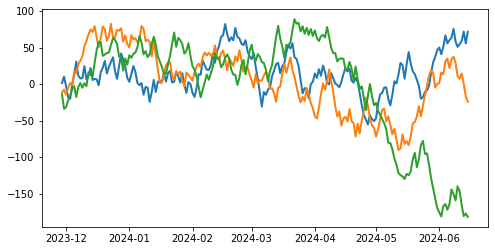

In [29]:
plt.plot(x,y)

## Interactive Plotting with Pyplot's *Global State* 
---
* Matplotlib's defaults are generally less than ideal
* One of its greatest strengths is the sheer amount of customization that can be performed 
* This is why a rich ecosystem of chart libraries that wrap Matplotlib exist 

## Configuring Matplotlib 
--- 
* Matplotlib provides a wide range of configurations
* They can be specified in the `matplotlibrc` file
* Or, dynamically through a dictionary like `rcParams` variable 

In [30]:
import matplotlib as mpl 
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.color'] = 'r'

## Interactive Plotting with Pyplot's *Global State* 
---
* That code changes the width and default color of plot lines 
* As well as using rcParams, the `gcf` method (get current figure) can be used to grab the last active figure

## Setting Figure Size
---
* If a plot's default readability is poor, or the width-to-height ratio is suboptimal the size may need to be changed
* By default Matplotlib uses inches for its plotting size 
* Matplotlib can save to a variety of backends and vector based graphics 
* We can utilize `pyplot` to set figure sizes 

In [31]:
plt.rcParams['figure.figsize'] =(8,4)
plt.gcf().set_size_inches(8,4)

<Figure size 576x288 with 0 Axes>

## Points, Not Pixels
---
* Matplotlib uses points, not pixels to measure the size of figures
* This is the accepted measure for print-quality publications
* Matplotlib is used to deliver publication-quality-images 
* By default, a point is approximately 1/72 of an inch wide
* Matplotlib allows this to be adjusted with dots-per-inch (dpi)

## Points, Not Pixels
---
* The high the DPI the better the image quality is
* For the purposes of in-notebook images, the resolution is a result of the backend generation image

## Labels and Legends
---
* Typically your figures need to say what the lines mean, among other things
* Matplotlib has a handy legend box for line labeling 
    * It like most things are heavily configurable 
* Labeling the lines does involve some indirection, as plot only takes one label
    * It is applied to all lines in general  

## Labels and Legends
---
* The plot command can return all `Line2D` objects created 
* These can be used by the `legend` method to set individual labels 
* The `legend` method can:
    * Set labels
    * Suggest a location for the legend box
    * Configure a number of other things

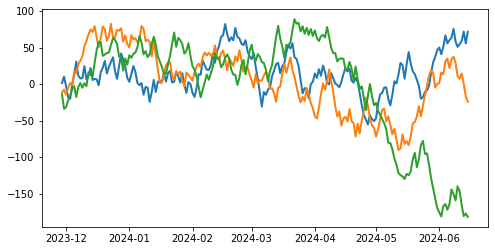

In [32]:
plots = plt.plot(x,y)
plots

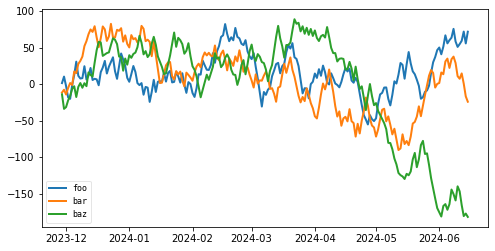

In [33]:
plt.legend(plots,('foo','bar','baz'),
           loc='best',
           framealpha=0.5,
           prop={'size':'small','family':'monospace'})
plt.plot(x,y)

## Labels and Legends
---
* That code:
    * Sets the labels for the plots
    * Uses the best location for the legend to avoid line overlap
    * Set's the legend's transparency 
    * Adjusts the font 

## Titles and Axes Labels
--- 
* Adding a title and label for the axes is easy 
* In addition adding some text to the figure can be done with the `figtext` method 

Text(0, 0.5, 'Running Total')

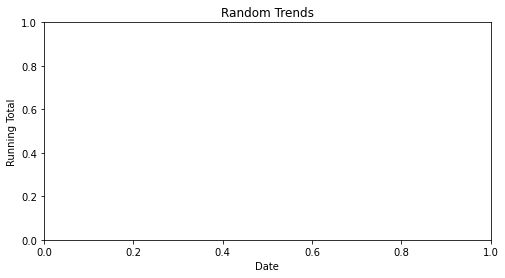

In [34]:
plt.title('Random Trends')
plt.xlabel('Date')
plt.ylabel('Running Total')

In [35]:
plt.figtext(0.995, 0.01,
u'© Acme designs 2015',
ha='right', va='bottom')

Text(0.995, 0.01, '© Acme designs 2015')

<Figure size 576x288 with 0 Axes>

## Saving Charts
--- 
* Matplotlib shines at saving plots, providing many output formats
* The available formats depend on the back-ends available, but generally:
    * PNG
    * PDF
    * PS 
    * EPS
    * SVG 
* Saving is as  simple as `plt.savefig("filename.whatever")`
* You can set the format explicitly with the `format=` keyword argument

## Figures and Object-Oriented Matplotlib
---
* Interactively manipulating Pyplot's global state works, primarily for quick data sketching, and single plot work 
* If you want to have more control over the charts, Matplotlib's `figure` and `axes` OOP approach is better
* Most advanced plotting demos utilize this

## Figures and Object-Oriented Matplotlib
---
* In essence with OOP Matplotlib you deal with a `figure`
    * A figure is essentially the drawing area with one or more axes (or plots) embedded within
* Both `figure` and `axes` ahve properties that can be independently specified
* In this sense, the interactive `pyplot` route mentioned earlier was plotting to a single axis of a  global figure 
* A figure can be created using Pyplot's `figure` method

In [36]:
fig = plt.figure(
    figsize=(8,4),
    dpi = 200,
    tight_layout = True,
    linewidth = 1, 
    edgecolor='r'
)

<Figure size 1600x800 with 0 Axes>

## Figures and Object-Oriented Matplotlib
---
* The figure shares a subset of properties with the global `pyplot` module
* These can be set on creation of the figure 
    * or through smaller methods like `fig.text()`
* Each `figure` can have multiple axes, each of which is analogous to a single, global, plot state
    * But, with the advantage that multiple axes can exist on one figure
        * Each with independent properties

## Axes and Subplots
--- 
* The `figure.add_axes` method allows precise control over the position of axes ina  figure 
    * Enabling you to embed a smaller plot in a main plot 
* Positioning of plot elements uses a `0->1` coordinate system 
    * 1 is the width or height of the figure
* The position can be specified using a four-element list
    * It sets top-left and bottom-right bounds 

In [37]:
fig.add_axes([.2, .2, .8, .8])

<Axes:>

[]

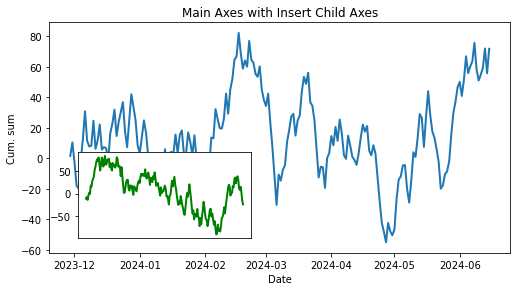

In [38]:
fig = plt.figure(figsize=(8,4))
# --- Main Axes
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_title('Main Axes with Insert Child Axes')
ax.plot(x, y[:,0])
ax.set_xlabel('Date')
ax.set_ylabel('Cum. sum')
# --- Inserted Axes
ax = fig.add_axes([0.15, 0.15, 0.3, 0.3])
ax.plot(x, y[:,1], color='g') # 'g' for green
ax.set_xticks([])

## Axes and Subplots
--- 
* The code selected the first column of random Numpy data
* It also removes the `x` ticks and labels from embedded data 
* `add_axes` gives a lot of scope for fine-tuning, most  of the time Matplotlib's built-in grid-layout systems makes life easier
* the simplest option is to use `figure.subplots` which allows the specifying of row-column layouts of equal sized plots 

## Axes and Subplots
--- 
* If you want a grid with different sized plots the `gridspec` method can be used 
* Calling `subplots` without arguments returns a figure with single axes
* This is the closest to using the `Pyplot` state machine 
* Calling `subplots` with arguments for numbers of rows (`nrows`) and columns (`ncolumns`) allows multiple plots to be placed in a grid layout 
* The call to `subplots` returns the `figure` and an array of `axes` in row-column order

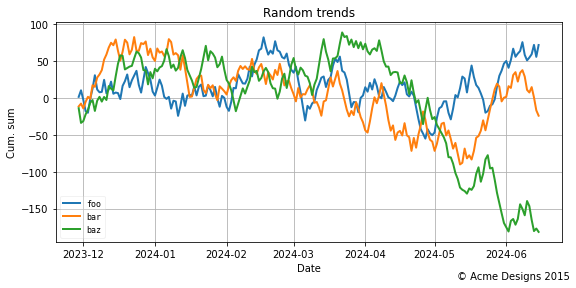

In [39]:
figure, ax = plt.subplots()
plots = ax.plot(x, y, label='')
figure.set_size_inches(8, 4)
ax.legend(plots, ('foo', 'bar', 'baz'), loc='best', framealpha=0.25,
prop={'size':'small', 'family':'monospace'})
ax.set_title('Random trends')
ax.set_xlabel('Date')
ax.set_ylabel('Cum. sum')
ax.grid(True)
figure.text(0.995, 0.01, u'\u00a9 Acme Designs 2015',
ha='right', va='bottom')
figure.tight_layout()

Text(0.5, 0, 'Date')

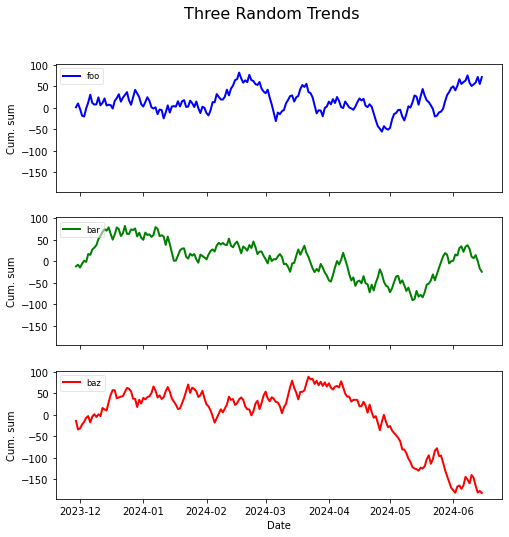

In [41]:
fig, axes = plt.subplots(
nrows=3, ncols=1,
sharex=True, sharey=True,
figsize=(8, 8))
labelled_data = zip(y.transpose(),
('foo', 'bar', 'baz'), ('b', 'g', 'r'))
fig.suptitle('Three Random Trends', fontsize=16)
for i, ld in enumerate(labelled_data):
    ax = axes[i]
    ax.plot(x, ld[0], label=ld[1], color=ld[2])
    ax.set_ylabel('Cum. sum')
    ax.legend(loc='upper left', framealpha=0.5,
        prop={'size':'small'})
axes[-1].set_xlabel('Date')

## Plot Types
--- 
* More than just line plots can be created
* Matplotlib has a number of plots available 
* These include:
    * Bar charts
    * Scatter plots
    * And more!

## Bar Charts
---
* The humble bar chart is a staple for a lot of visual data exploration 
* As with most Matplotlib charts, there is space for customization 
* There are also a few variants
* Often you will have to supply your own bar and label locations 

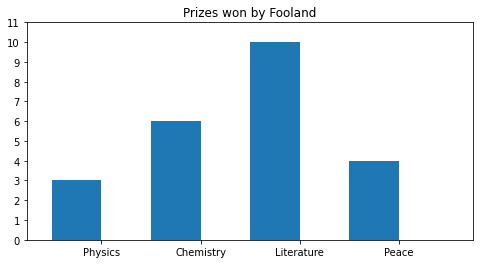

In [42]:
labels = ["Physics", "Chemistry", "Literature", "Peace"]
foo_data = [3, 6, 10, 4]
bar_width = 0.5
xlocations = np.array(range(len(foo_data))) + bar_width
plt.bar(xlocations, foo_data, width=bar_width)
plt.yticks(range(0, 12))
plt.xticks(xlocations+bar_width/2, labels)
plt.xlim(0, xlocations[-1]+bar_width*2)
plt.title("Prizes won by Fooland")
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.gcf().set_size_inches((8, 4))

## Scatter Plots
--- 
* Scatter plots are another useful chart
* They take a 2D arrays of points, with options for size, color, and more
* Matplotlib is able to autoscale the x and y limits 

Text(0.5, 0.98, 'A Simple Scatterplot')

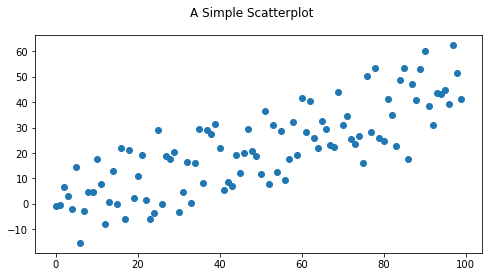

In [3]:
num_points = 100
gradient = 0.5
x = np.array(range(num_points))
y = np.random.randn(num_points) * 10 + x*gradient
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y)
fig.suptitle('A Simple Scatterplot')

## Scatter Plots
---
* The size and color of individual points can be adjusted by passing an array of marker sizes and color indices to the current color map
* We are specifying the area of the marker's bounding boxes, not the circles' diameters
* So if you want the diameter to double, then you need increase the points by a factor of four

Text(0.5, 0.98, 'Scatterplot with Color and Size Specified')

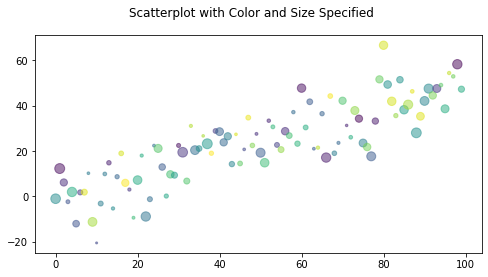

In [4]:
num_points = 100
gradient = 0.5
x = np.array(range(num_points))
y = np.random.randn(num_points) * 10 + x*gradient
fig, ax = plt.subplots(figsize=(8, 4))
colors = np.random.rand(num_points)
size = (2 + np.random.rand(num_points) * 8) ** 2
ax.scatter(x, y, s=size, c=colors, alpha=0.5)
fig.suptitle('Scatterplot with Color and Size Specified')